# Basis set superposition error (BSSE)

>"BSSE is present in all molecular electronic structure calculations in which orbitals are approximated by expansion in terms of analytic basis functions centered on different points (usually the nuclei) that are dependent on the geometry of the system being studied." (10.1002/JCC.20438)

>Most LCAO basis set types (Gaussians, Slater-type orbitals, . . . ) do not describe the free atom exactly. (10.1016/j.cpc.2009.06.022)

>The error arises when two chemical fragments, A and B, approach to form the AB supermolecule. The description
of fragment A within the complex can be improved by the functions of fragment B and vice versa. (10.1002/JCC.20438)

>In the process A + B to AB, the total energy decreases by two factors; the stabilization of the system due to the fragments interaction and the improvement in the individual atomic description.<br>
The second error (BSSE) is an artifact, which causes an unphysical overestimation of the interaction energy.<br>
These errors have been mainly discussed in studies of weak interactions, such as van der Waals interactions. (10.1002/JCC.20438)




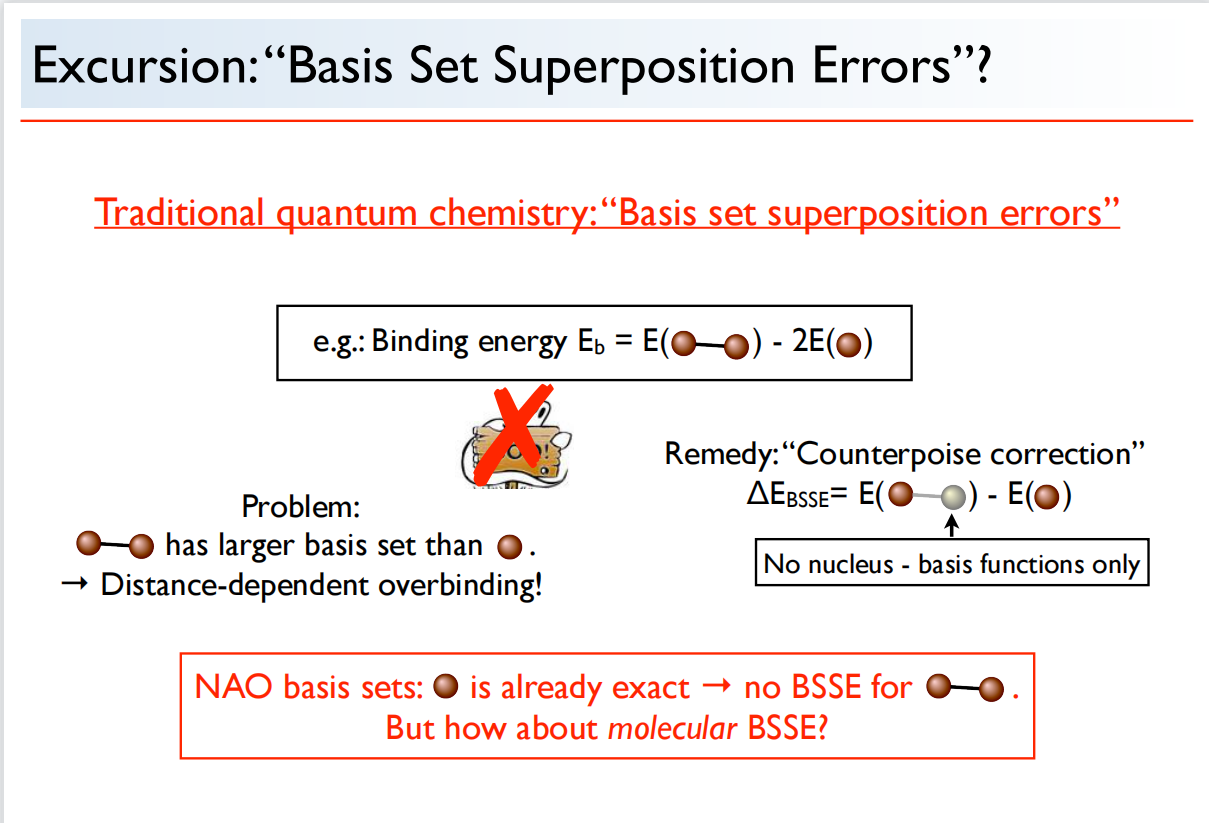

FHI-aims employs numeric atom-centered (NAO) basis functions which also has BSSE.

>By construction, our NAO basis sets do not incur any BSSE at all in Eq. (12) for non-spinpolarized, spherical reference atoms.<br>
The exact valence wave functions of these atoms are already part of the basis (the minimal basis), and no variational improvement is possible by adding further basis functions. (10.1016/j.cpc.2009.06.022)

Intramolecular BSSE is said not to be a problem for FHI-aims with non-spinpolarized, spherical reference atoms.

>This argument no longer strictly holds for spin-polarized and/or non-spherical reference atoms, and perhaps even more importantly for intermolecular binding energies.<br>
The wave function for each individual molecular fragment is certainly not exact. (10.1016/j.cpc.2009.06.022)


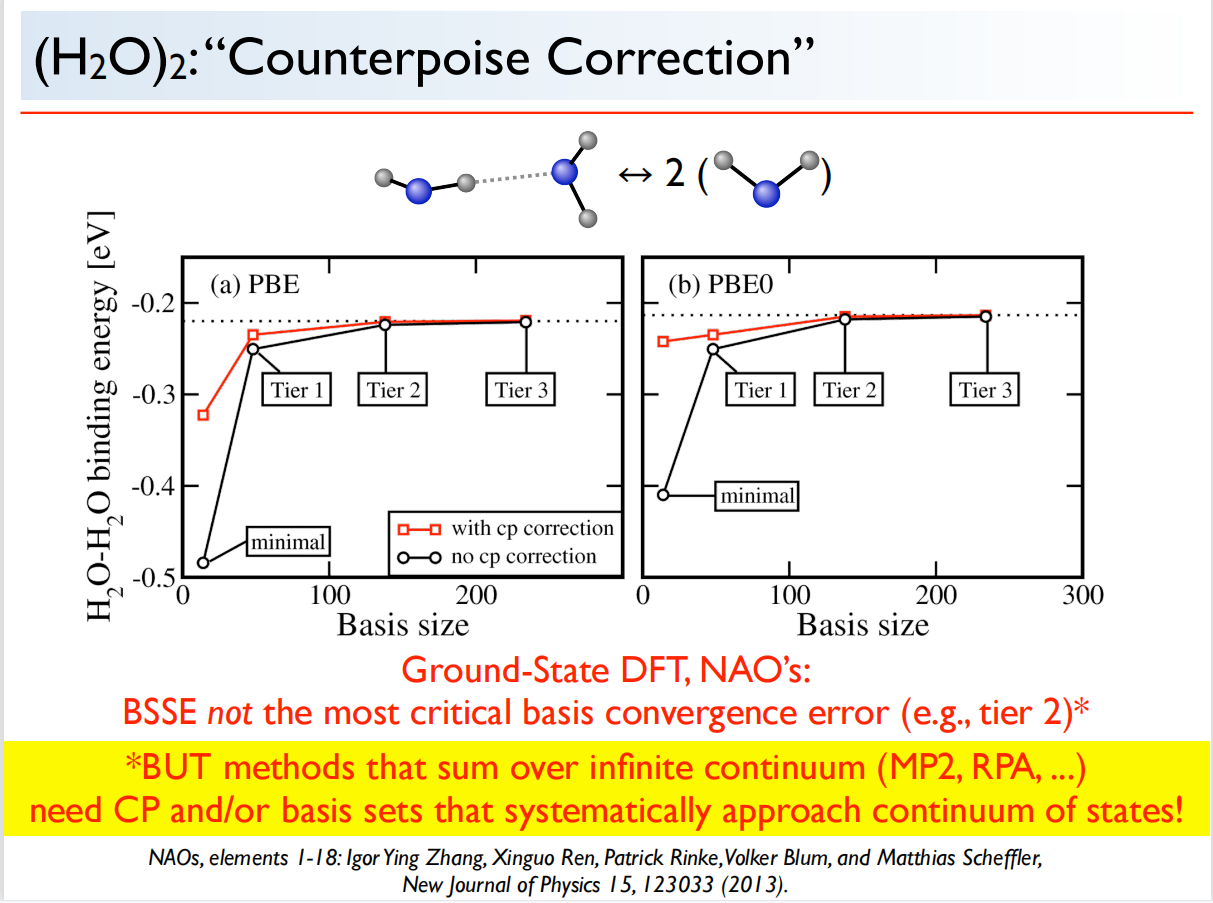

# Counterpoise correction

BSSE can be removed using the counterpoise (CP) technique

>Comment on “On the importance of the fragment relaxation energy terms in the estimation of the basis set superposition error correction to the intermolecular interaction energy” [J. Chem. Phys. <b>104</b> , 8821 (1996)] (10.1063/1.476667).

The electronic energy of system $S$ at geometry $G$ computed with basis set $σ$ is denoted by $E_{S}^{σ}$($G$)

If basis sets used for $A$ and $B$ are denoted by $\alpha$ and $\beta$, the defination of BSSE counterpoise correctuib takes the following form:

$δ E_{CP}$ = $E_{A}^{α}$($AB$) + $E_{B}^{β}$($AB$) -  $E_{A}^{α \cup β}$($AB$) -  $E_{B}^{\alpha \cup β}$($AB$)




### Interaction Energy

Let's assume we are using a prefect basis set and we can get exact energies. The interaction energy for a dimer AB is defined as follows.

$E_{int}$ = $E_{AB}$($AB$) - $E_{A}$($AB$) - $E_{B}$($AB$)

Note this is different from the energy difference we usually use such as adsorption energy, which is defined as follows.

### Energy difference against isolated molecules (A, B)

Δ$E$ = $E_{AB}$($AB$) - $E_{A}$($A$) - $E_{B}$($B$)

### Conversion between Δ$E$ and $E_{int}$

Δ$E$ = $E_{int}$ + $E_{A}$($AB$) + $E_{B}$($AB$) - $E_{A}$($A$) - $E_{B}$($B$)

Let $E^{dist}$ = $E_{A}$($AB$) + $E_{B}$($AB$) - $E_{A}$($A$) - $E_{B}$($B$)

Δ$E$ = $E_{int}$ + $E^{dist}$

**The second term** is basically the energy change in the **deformation** process from  geometries of **isolated molecule** to geometries of **the complex**.



**Unfortunately, there are no perfect basis sets yet.** Two types of errors, basis set completeness error and basis set superposition error, are introduced when calculating the quantities above.

The second one is the stabilization of the system due to **the improvement in the individual atomic description via utilizing the basis function of the other fragment**, and could be reduced by the counterpoise correction.

####Interaction Energy with basis functions from both fragments (α ∪ β)

NO **improvement in the individual atomic description via utilizing the basis function of the other fragment**

$E_{int}^{CP}$ = $E_{AB}^{α \cup β}$($AB$) - $E_{A}^{α\cup β}$($AB$) - $E_{B}^{α\cup β}$($AB$)

####Iteraction Energy calulated in the normal way

$E_{int}^{noCP}$ = $E_{AB}^{α \cup β}$($AB$) - $E_{A}^{α}$($AB$) - $E_{B}^{β}$($AB$)

Therefore,

$δ E_{CP}$ = $E_{int}^{CP}$ - $E_{int}^{noCP}$

i.e. $δ E_{CP}$ = $E_{A}^{α}$($AB$) + $E_{B}^{β}$($AB$) -  $E_{A}^{α \cup β}$($AB$) -  $E_{B}^{\alpha \cup β}$($AB$)

###Q: Why is $E^{dist}$ not considered in counterpoise correction?

The process from two isolated chemical fragments (A,B) to a dimer complex (AB) is disintegrated into the deformation process and the interaction between the fragments. The deformation from from geometries of isolated molecule to geometries of the complex is only relevant to basis sets for A or B, i.e. no interaction. Therefore there is no need for counterpoise correction for $E^{dist}$.

###How to use counterpoise_onepot.py

In [ ]:
from carmm.analyse.counterpoise_onepot import counterpoise_calc

def my_calc():
  ...
  return fhi_calc

CO2_Cu = read('CO2_ad_Cu_100.traj')
a_id = ['C', 'O']
b_id = ['Cu']
a_name = 'CO2'
b_name = 'Cu100slab'

####Carmm is not updated with counterpoise_onepot.py on some hpc
1. Copy counterpoise_onepot.py to your working directory
2. Replace the import command above with `from counterpoise_onepot import counterpoise_calc`

In [ ]:
cp = counterpoise_calc(CO2_Cu, a_id, b_id, fhi_calc=my_calc(),
                      a_name=a_name, b_name=b_name, verbose=True)

#### Note socket calculator can not be used for `fhi_calc`